In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point, Polygon

In [3]:
#depth = pd.read_csv('./Data/Jasechko_et_al_2024_GroundwaterLevelData/AnnualDepthToGroundwater.csv')
#elev = pd.read_csv('./Data/Jasechko_et_al_2024_GroundwaterLevelData/AnnualGroundwaterElevation.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Data/Jasechko_et_al_2024_GroundwaterLevelData/AnnualDepthToGroundwater.csv'

In [ ]:
#depth.head(), elev.head()

In [ ]:
#depth['StnID'].nunique(), elev['StnID'].nunique()

In [ ]:
#depth['StnID'].value_counts(), elev['StnID'].value_counts()

In [ ]:
#elev.describe()

In [ ]:
#depth.shape

In [ ]:
#depth['StnID'].value_counts()

In [ ]:
#elev['StnID'].value_counts()

In [ ]:
#elev.shape

In [ ]:
#drop all stations that didn't get a depth
#merge_depth = pd.merge(depth, elev, how='left', on='StnID')

In [ ]:
#drop all stations that didn't get elevation
#merge_elev = pd.merge(elev, depth, how='left', on='StnID')

In [ ]:
# print(depth.shape)
# print(elev.shape)
# print(merge_depth.shape)
# print(merge_elev.shape)

**An "inner" join will drop all rows that don't have a match on the other side**
- in this case, we'd be dropping all ratings that don't have a movieId
- it's possible a rating on th eleft didn't get a title by accident and we don't wnat to drop that
- It will also drop all movies that were never rated
- this will shirnk your data set


**A "left" join will drop all movies that didn't get a rating**
- this is ok becasue we're looking at ratings today
- We are doing this join because we want to keep all the ratings no matter what


**An "outer" join is we're keeping everything no matter what**
- this would keep every rating regardless if it has a movie attached
- we would also be keeping every movie regardless if we had a rating for it, which since we're looking at ratings, there is no point to *Outer joins will blow up your dataset

In [ ]:
# merge_depth.sample(10)

In [ ]:
# merge_depth.IntegerYear_y.astype('int64')
# merge_depth.dtypes

In [ ]:
# merge_inner = pd.merge(depth, elev, how='inner', on=['StnID', 'IntegerYear'])

In [ ]:
# merge_inner.sample(10)

In [ ]:
print(depth.shape)
print(elev.shape)
print(merge_depth.shape)
print(merge_elev.shape)
print(merge_inner.shape)

In [ ]:
merge_inner.drop(columns=['Lat_y', 'Lon_y'], inplace=True)

In [ ]:
merge_inner.head()

In [ ]:
#merge_inner.to_csv('./Team2/Da'data')

In [ ]:
airplane = pd.read_csv('./Data/AviationData.csv')
airplane.head()

In [ ]:
airplane.shape

In [ ]:
airplane.columns

In [ ]:
airplane.dtypes

| Column Name            | Description                                                                                        | Type         |
|------------------------|----------------------------------------------------------------------------------------------------|--------------|
| ARREST_KEY             | Randomly generated persistent ID for each arrest                                                    | Plain Text   |
| ARREST_DATE            | Exact date of arrest for the reported event                                                         | Date & Time  |
| PD_CD                  | Three digit internal classification code (more granular than Key Code)                             | Number       |
| PD_DESC                | Description of internal classification corresponding with PD code (more granular than Offense Desc) | Plain Text   |
| KY_CD                  | Three digit internal classification code (more general category than PD code)                       | Number       |
| OFNS_DESC              | Description of internal classification corresponding with KY code (more general category than PD Desc)| Plain Text |
| LAW_CODE               | Law code charges corresponding to the NYS Penal Law, VTL and other various local laws               | Plain Text   |
| LAW_CAT_CD             | Level of offense: felony, misdemeanor, violation                                                   | Plain Text   |
| ARREST_BORO            | Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)               | Plain Text   |
| ARREST_PRECINCT        | Precinct where the arrest occurred                                                                | Number       |
| JURISDICTION_CODE      | Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions | Number |
| AGE_GROUP              | Perpetrator’s age within a category                                                               | Plain Text   |
| PERP_SEX               | Perpetrator’s sex description                                                                     | Plain Text   |
| PERP_RACE              | Perpetrator’s race description                                                                    | Plain Text   |
| X_COORD_CD             | Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) | Number |
| Y_COORD_CD             | Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) | Number |
| Latitude               | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)             | Number       |
| Longitude              | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)            | Number       |
| New Georeferenced Column | Point                                                                                              |              |


In [4]:
nypd = pd.read_csv('./Data/NYPD_Arrest_Data__Year_to_Date__20240308.csv')
crs = {'init':'epsg:4326'}
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135)


In [5]:
nypd.rename(columns={'New Georeferenced Column': 'geometry'}, inplace=True)
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135)


In [6]:
nypd.shape

(226872, 19)

In [7]:
nypd.isna().sum()

ARREST_KEY              0
ARREST_DATE             0
PD_CD                   2
PD_DESC                 0
KY_CD                  17
OFNS_DESC               0
LAW_CODE                0
LAW_CAT_CD           1599
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
geometry                0
dtype: int64

In [8]:
nypd[nypd['KY_CD'].isna()].head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
36301,266921568,04/19/2023,123.0,(null),NaN,(null),PL 1251401,F,M,34,0,25-44,F,BLACK HISPANIC,1002161,249364,40.851104,-73.935254,POINT (-73.935254 40.851104)
55084,267744043,05/04/2023,777.0,(null),NaN,(null),PL 1950200,F,K,63,0,18-24,M,BLACK,1000520,168264,40.628508,-73.941384,POINT (-73.941384 40.628508)
66453,268999338,05/29/2023,777.0,(null),NaN,(null),PL 1950200,F,B,44,0,18-24,F,WHITE,1006537,244511,40.837774,-73.919455,POINT (-73.919455 40.837774)
71109,266655043,04/13/2023,777.0,(null),NaN,(null),PL 1950200,F,K,81,0,45-64,M,BLACK,1005312,190540,40.689640,-73.924051,POINT (-73.924051 40.68964)
106034,272543802,08/08/2023,777.0,(null),NaN,(null),PL 1950200,F,Q,105,0,45-64,M,WHITE HISPANIC,1057766,203992,40.726284,-73.734760,POINT (-73.73476 40.726284)


In [9]:
nypd['OFNS_DESC'].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      33839
PETIT LARCENY                     23888
FELONY ASSAULT                    21121
DANGEROUS DRUGS                   15701
MISCELLANEOUS PENAL LAW           14862
                                  ...  
FELONY SEX CRIMES                     3
HOMICIDE-NEGLIGENT-VEHICLE            3
DISRUPTION OF A RELIGIOUS SERV        2
ADMINISTRATIVE CODES                  2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: count, Length: 64, dtype: int64

In [39]:
street_map = gpd.read_file('./Data/Digital_City_Map_Shapefile.geojson')

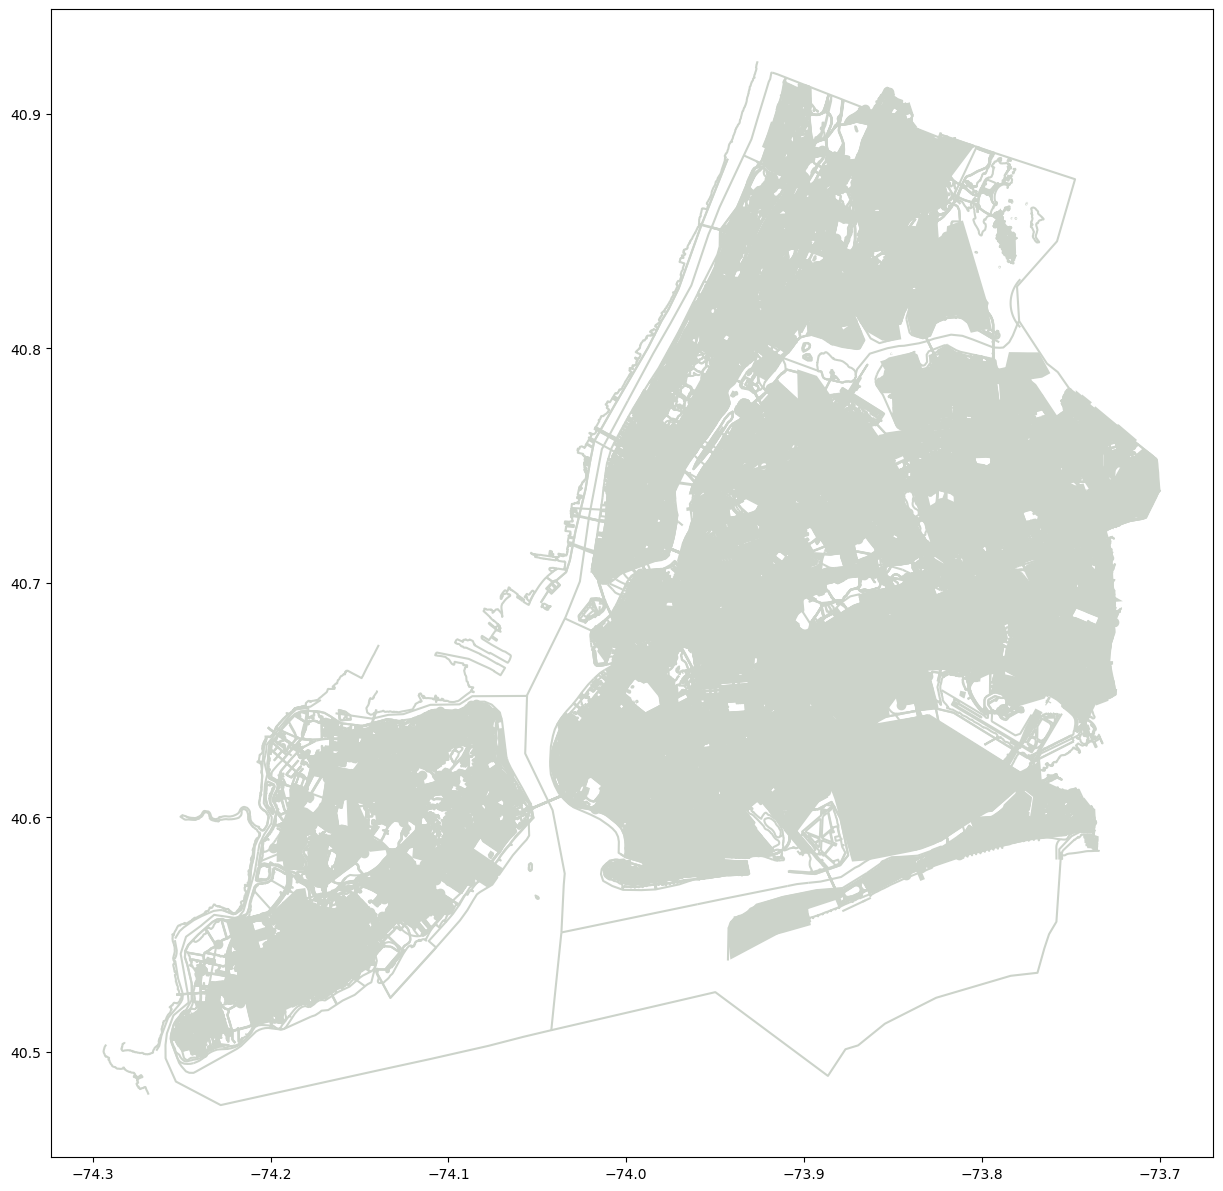

In [70]:
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, color='#CCD3CA');

In [52]:
nypd['OFNS_DESC'].unique()

array(['ROBBERY', 'FELONY ASSAULT', 'BURGLARY', 'ARSON',
       'CRIMINAL TRESPASS', 'ASSAULT 3 & RELATED OFFENSES', 'RAPE',
       'FORGERY', 'PETIT LARCENY', 'SEX CRIMES', 'THEFT-FRAUD',
       'JOSTLING', 'KIDNAPPING', 'MISCELLANEOUS PENAL LAW',
       'VEHICLE AND TRAFFIC LAWS', 'FRAUDS', 'OFFENSES INVOLVING FRAUD',
       'OTHER OFFENSES RELATED TO THEF', 'DANGEROUS WEAPONS',
       'DANGEROUS DRUGS', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'CRIMINAL MISCHIEF & RELATED OF', 'OTHER STATE LAWS (NON PENAL LA',
       'OFFENSES AGAINST THE PERSON', 'INTOXICATED & IMPAIRED DRIVING',
       'OFFENSES AGAINST PUBLIC ADMINI', 'NYS LAWS-UNCLASSIFIED FELONY',
       'GRAND LARCENY', 'CANNABIS RELATED OFFENSES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'FOR OTHER AUTHORITIES', 'UNAUTHORIZED USE OF A VEHICLE',
       'OTHER TRAFFIC INFRACTION', "BURGLAR'S TOOLS",
       'ALCOHOLIC BEVERAGE CON

In [55]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(nypd['Latitude'], nypd['Longitude'])]
geometry[:3]

[<POINT (40.856 -73.844)>, <POINT (40.645 -74.077)>, <POINT (40.594 -73.961)>]

In [68]:
#crime = {'ROBBERY': 0}
nypd_geo = gpd.GeoDataFrame(nypd, crs=crs, geometry=geometry)
#nypd_geo['OFNS_DESC'] = nypd_geo['OFNS_DESC'].map(crime)
nypd_geo.head(5)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (40.85579 -73.84391)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (40.64500 -74.07726)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (40.59405 -73.96087)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (40.76955 -73.91536)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (40.82413 -73.91717)


In [83]:
nypd_geometry = [Point(xy) for xy in zip(nypd['Longitude'], nypd['Latitude'])]
nypd_geo = gpd.GeoDataFrame(nypd,
                          crs=crs,
                          geometry=nypd_geometry)
nypd_geo.head()

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,geometry
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),POINT (-73.84391 40.85579)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996),POINT (-74.07726 40.64500)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054),POINT (-73.96087 40.59405)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552),POINT (-73.91536 40.76955)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135),POINT (-73.91717 40.82413)


<Axes: >

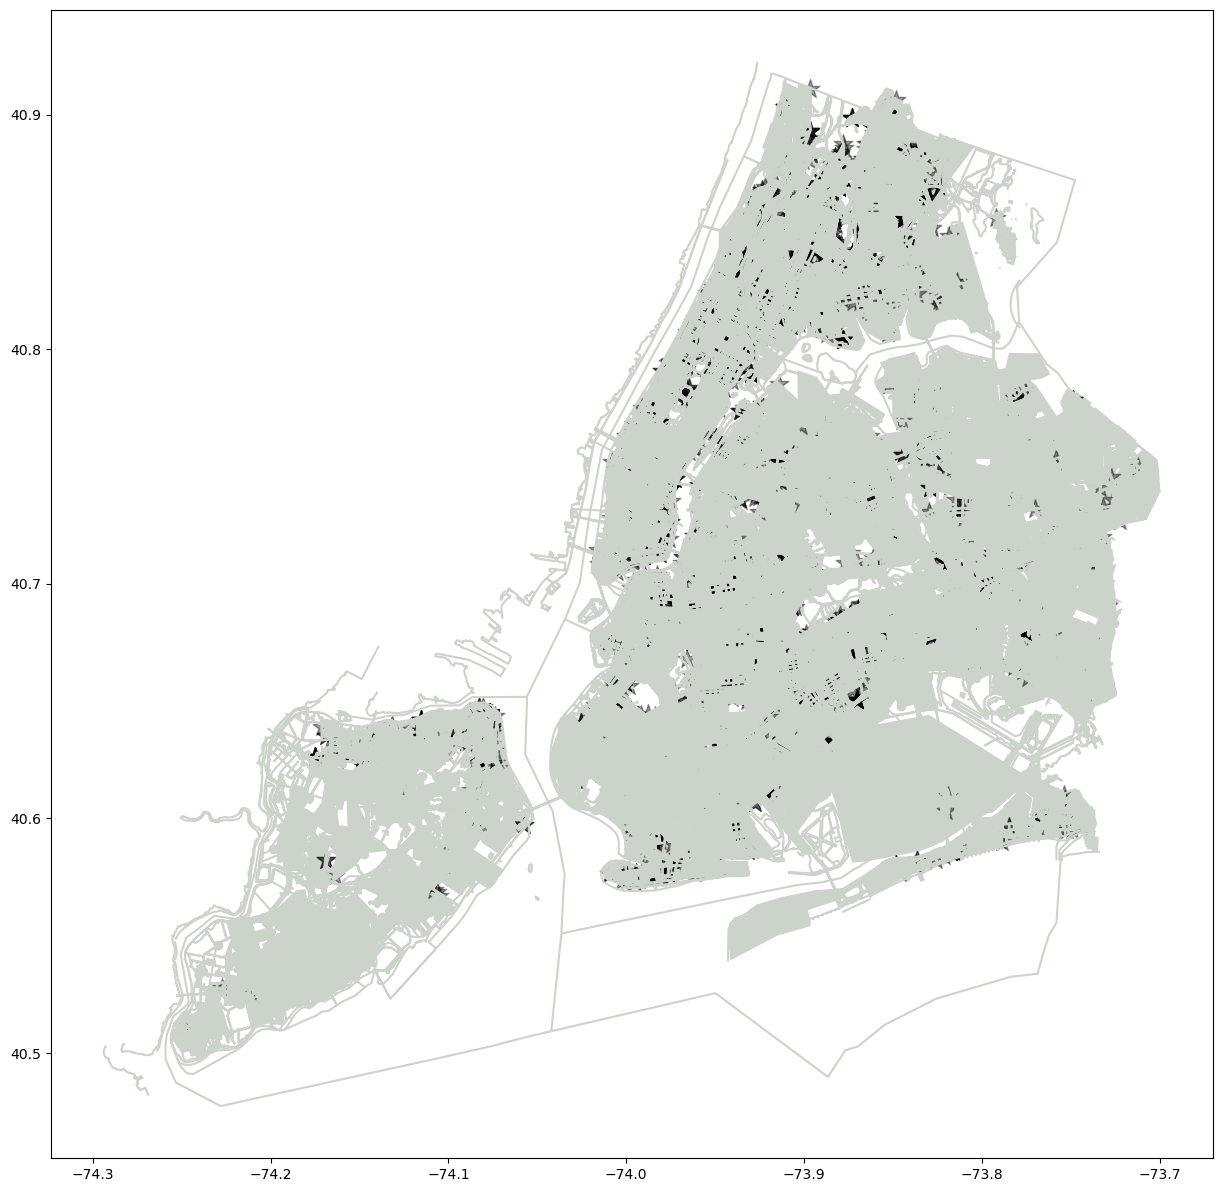

In [88]:
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, color='#CCD3CA')
nypd_geo[nypd_geo['OFNS_DESC']=="ROBBERY"].plot(ax=ax, marker="*", markersize=200, alpha=0.4,color="black")


# nypd_geo.plot(
#     ax=ax,
#     marker='o',
#     color='#F5E8DD'
# );

<Axes: >

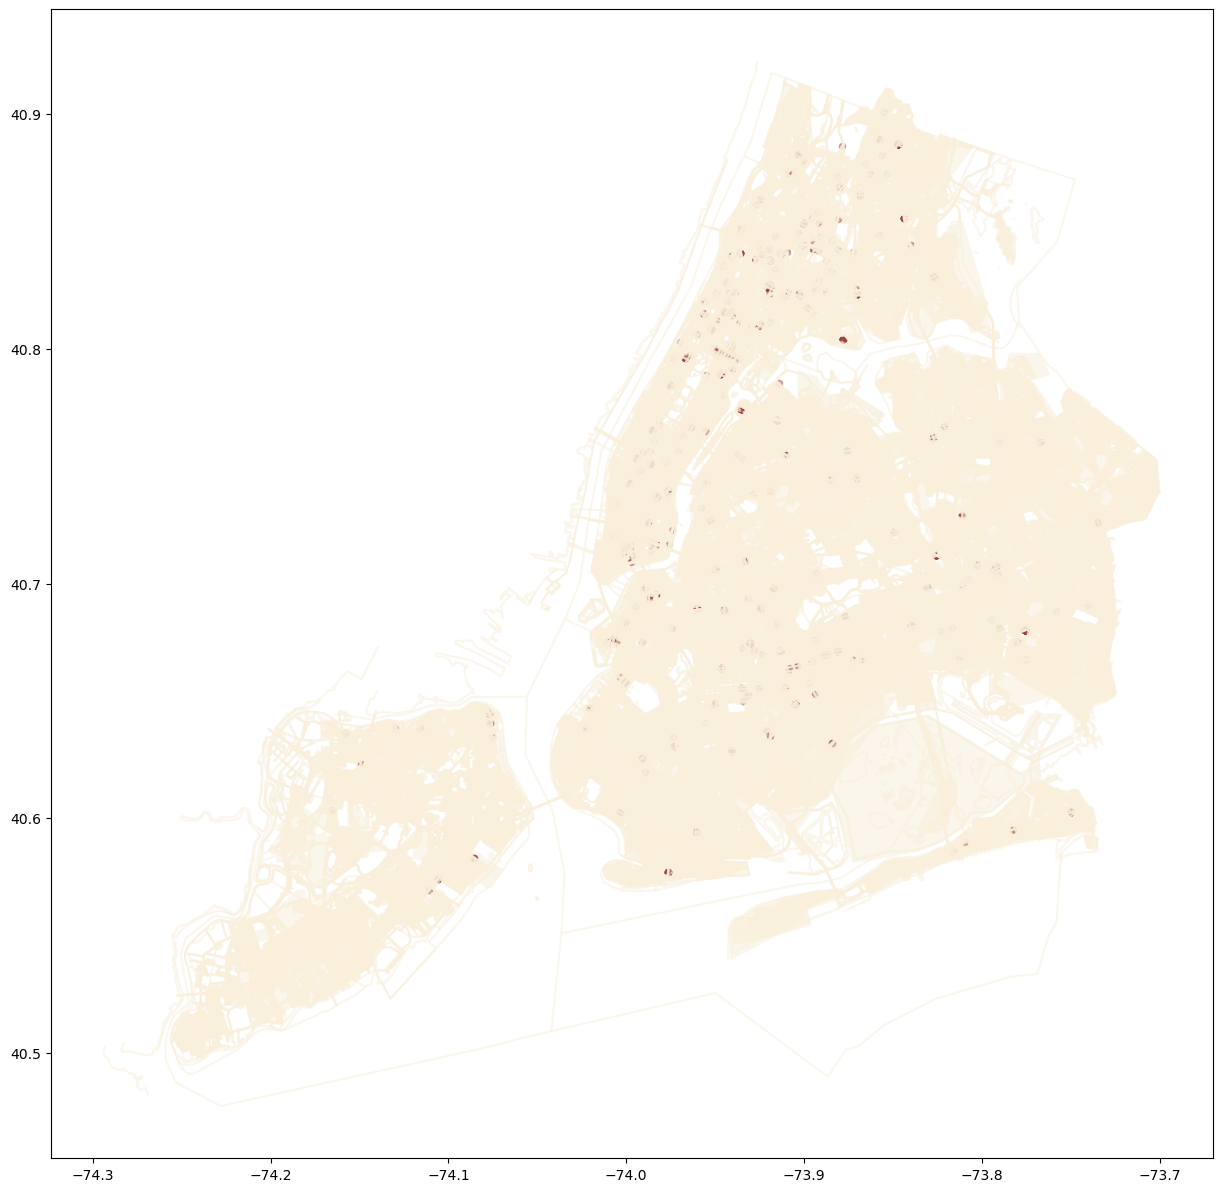

In [177]:
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, alpha=0.5, color='#F9EFDB')
nypd_geo[nypd_geo['OFNS_DESC']=="MURDER & NON-NEGL. MANSLAUGHTE"].plot(ax=ax, marker="o", markersize=20, alpha=0.4,color="#9B4444")




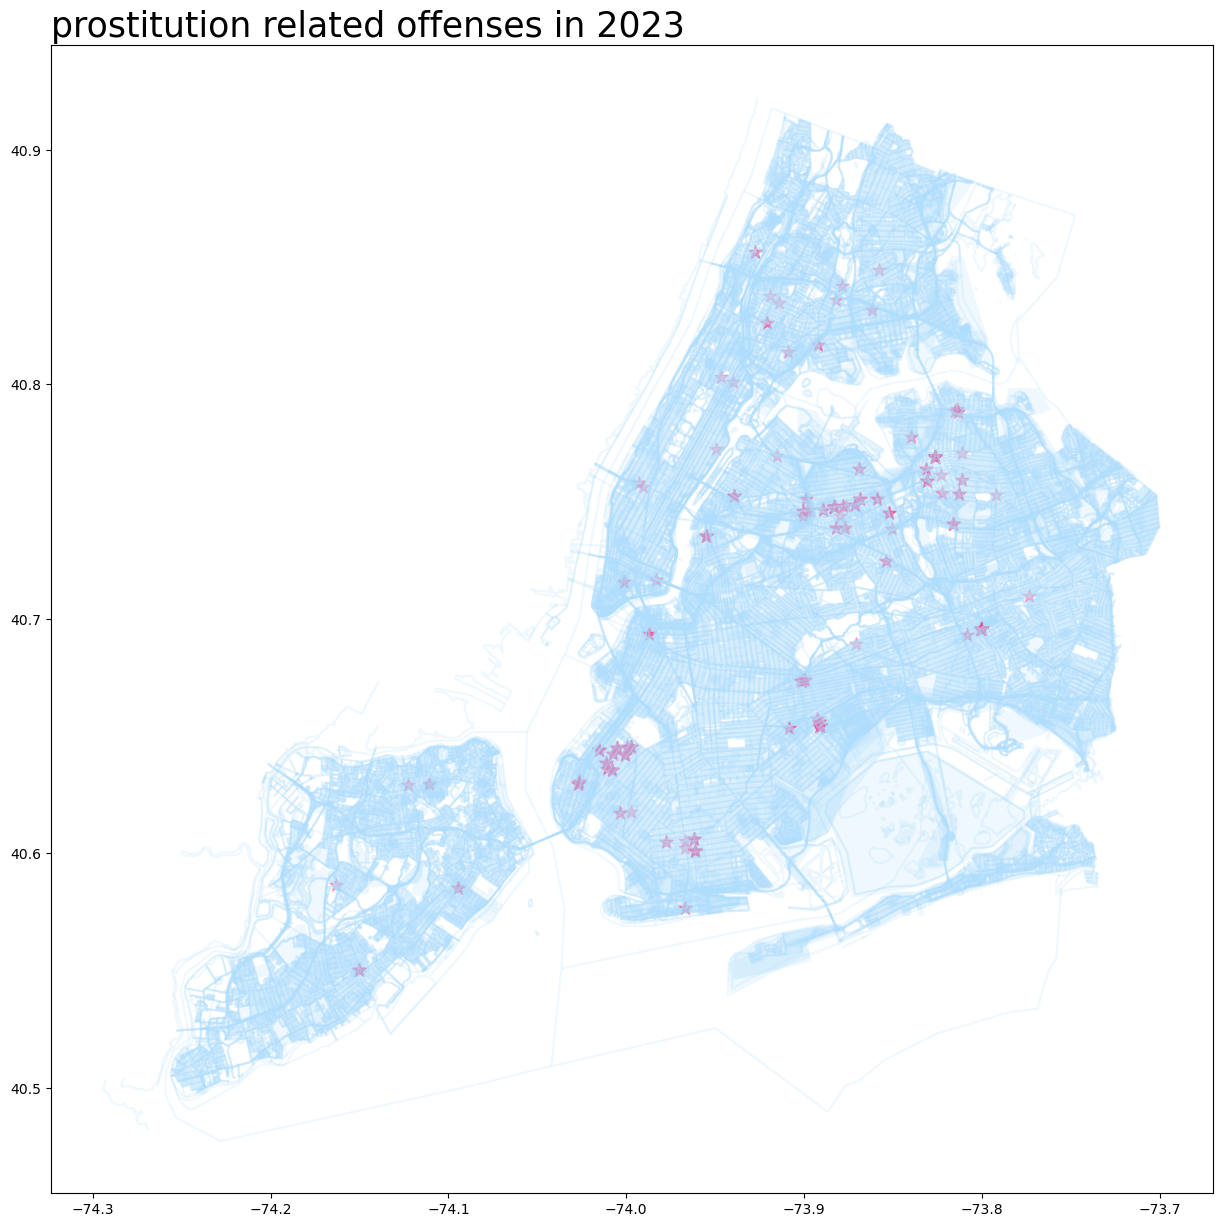

In [102]:
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, alpha=0.2, color='#AEDEFC')
nypd_geo[nypd_geo['OFNS_DESC']=="PROSTITUTION & RELATED OFFENSES"].plot(ax=ax, marker="*", markersize=100, alpha=0.4,color="#F7418F")
plt.title('prostitution related offenses in 2023', loc='left', fontsize=25);

In [103]:
nypd_geo.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,geometry
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),POINT (-73.84391 40.85579)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996),POINT (-74.07726 40.64500)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054),POINT (-73.96087 40.59405)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552),POINT (-73.91536 40.76955)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135),POINT (-73.91717 40.82413)


In [128]:
nypd_geo.dtypes
dummy_offenses = pd.get_dummies(nypd_geo['OFNS_DESC'], drop_first=True)
dummies_precinct = pd.concat((nypd_geo[['ARREST_PRECINCT']], dummy_offenses))
dummies_precinct.head()

,ARREST_PRECINCT,ADMINISTRATIVE CODE,ADMINISTRATIVE CODES,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,...,POSSESSION OF STOLEN PROPERTY,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNLAWFUL POSS. WEAP. ON SCHOOL,VEHICLE AND TRAFFIC LAWS
0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

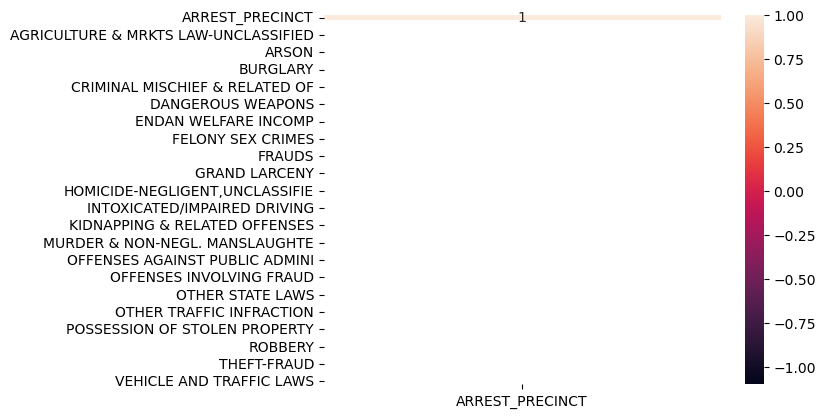

In [131]:
dummies_precinct.corr()
sns.heatmap(dummies_precinct.corr()[['ARREST_PRECINCT']], annot=True, vmin = -1.1, vmax = 1)

In [132]:
nypd_geo['ARREST_PRECINCT'].value_counts()

ARREST_PRECINCT
14     7791
75     7219
44     7213
40     7203
103    6219
       ... 
100    1121
123    1022
17     1016
111     878
22       91
Name: count, Length: 77, dtype: int64

In [1]:
nypd['OFNS_DESC'].value_counts()

NameError: name 'nypd' is not defined

In [144]:
precinct_14 = nypd_geo[nypd_geo['ARREST_PRECINCT'] == 14]
precinct_14['OFNS_DESC'].value_counts()

OFNS_DESC
PETIT LARCENY                           1921
GRAND LARCENY                            785
DANGEROUS DRUGS                          770
ASSAULT 3 & RELATED OFFENSES             719
OTHER OFFENSES RELATED TO THEF           497
FELONY ASSAULT                           415
ROBBERY                                  340
BURGLARY                                 318
DANGEROUS WEAPONS                        250
CRIMINAL MISCHIEF & RELATED OF           235
FORGERY                                  197
OFFENSES AGAINST PUBLIC ADMINI           190
MISCELLANEOUS PENAL LAW                  155
SEX CRIMES                               136
POSSESSION OF STOLEN PROPERTY            130
CRIMINAL TRESPASS                         81
OFF. AGNST PUB ORD SENSBLTY &             78
OTHER STATE LAWS (NON PENAL LA            71
FRAUDS                                    58
OFFENSES INVOLVING FRAUD                  55
VEHICLE AND TRAFFIC LAWS                  52
OTHER STATE LAWS                          51


In [145]:
precinct_75 = nypd_geo[nypd_geo['ARREST_PRECINCT'] == 75]
precinct_75['OFNS_DESC'].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            940
FELONY ASSAULT                          755
MISCELLANEOUS PENAL LAW                 697
VEHICLE AND TRAFFIC LAWS                664
DANGEROUS DRUGS                         424
ROBBERY                                 420
DANGEROUS WEAPONS                       374
PETIT LARCENY                           353
CRIMINAL MISCHIEF & RELATED OF          349
OTHER OFFENSES RELATED TO THEF          248
GRAND LARCENY                           238
OFFENSES AGAINST PUBLIC ADMINI          197
BURGLARY                                177
OFF. AGNST PUB ORD SENSBLTY &           175
POSSESSION OF STOLEN PROPERTY           150
FORGERY                                 141
GRAND LARCENY OF MOTOR VEHICLE          122
OTHER TRAFFIC INFRACTION                102
OFFENSES INVOLVING FRAUD                101
SEX CRIMES                               98
INTOXICATED & IMPAIRED DRIVING           71
MURDER & NON-NEGL. MANSLAUGHTE           69
NYS LAWS-UNCLASSIFIED 

In [134]:
dum_offense = pd.get_dummies(precinct_14['OFNS_DESC'])

In [141]:
dum_offense.sum(axis=1)

191       1
194       1
209       1
218       1
336       1
         ..
226735    1
226775    1
226795    1
226833    1
226834    1
Length: 7791, dtype: int64

In [135]:
precinct_14 = pd.concat((precinct_14, dum_offense), axis=1)

In [136]:
precinct_14.sample(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PETIT LARCENY,POSSESSION OF STOLEN PROPERTY,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS
217519,279733698,12/31/2023,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,14,...,True,False,False,False,False,False,False,False,False,False
120243,270139221,06/20/2023,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,M,14,...,False,False,False,False,False,False,False,False,False,False
27059,264640321,03/06/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,...,False,False,False,False,False,False,False,False,False,False
93015,267617443,05/02/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,...,False,False,False,False,False,False,False,False,False,False
201092,277307481,11/10/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,14,...,False,False,False,False,True,False,False,False,False,False
149278,272335253,08/03/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,M,14,...,False,False,False,False,False,False,False,False,False,False
37878,264647540,03/06/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,M,14,...,False,False,False,False,False,False,False,False,False,False
22575,261875998,01/13/2023,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,14,...,True,False,False,False,False,False,False,False,False,False
182114,274715662,09/20/2023,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,14,...,True,False,False,False,False,False,False,False,False,False
104911,269608976,06/09/2023,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,M,14,...,False,True,False,False,False,False,False,False,False,False


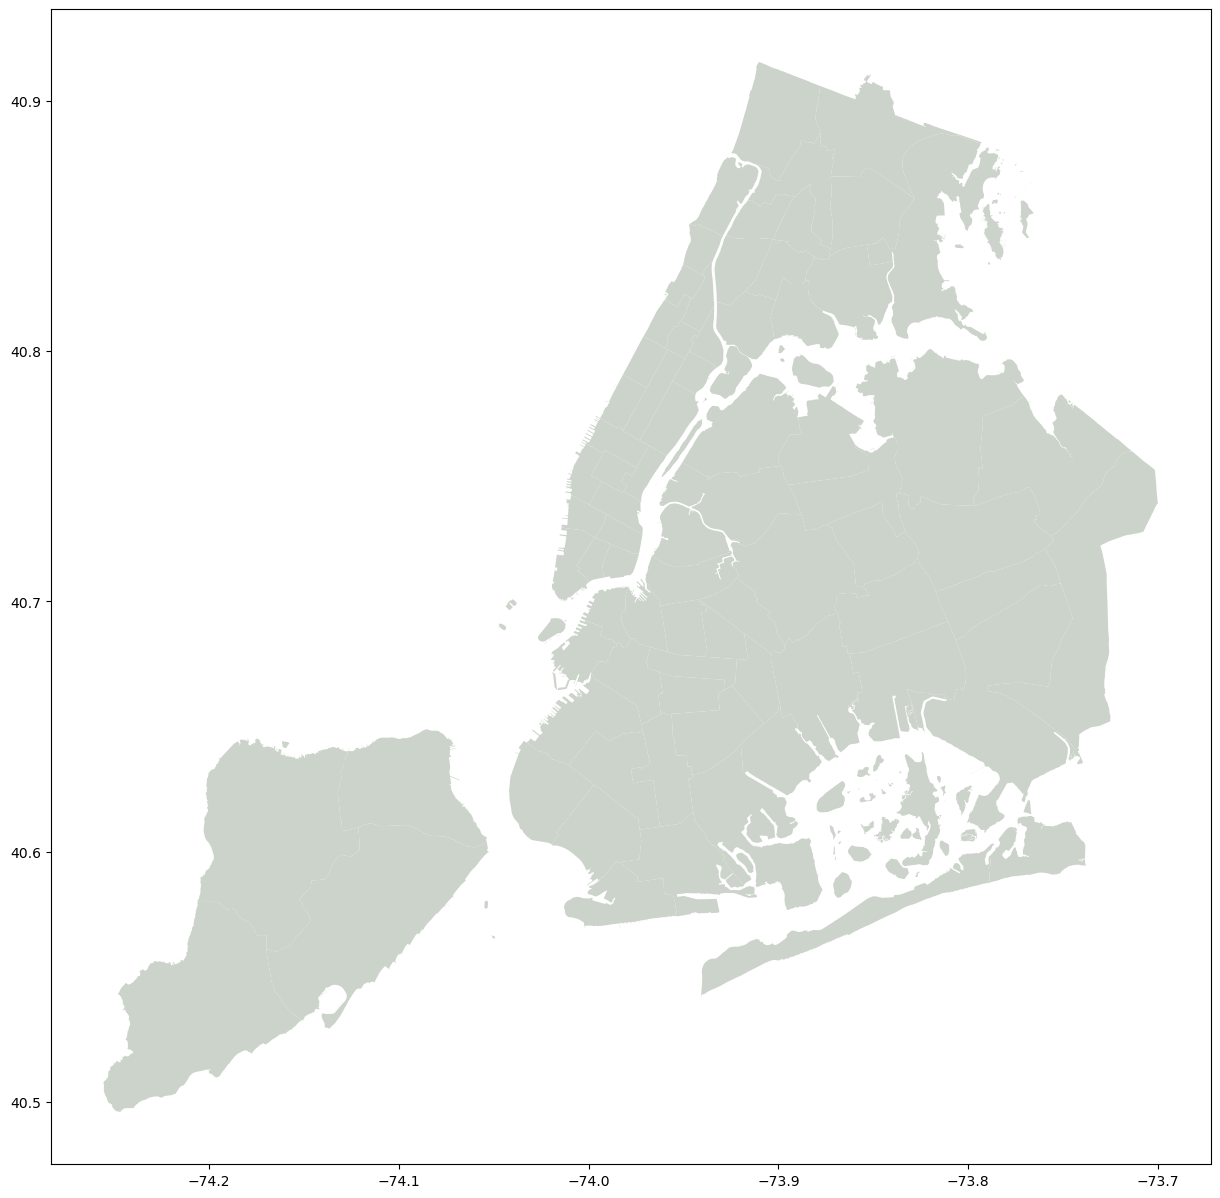

In [147]:
precinct_map = gpd.read_file('./Data/PolicePrecincts.geojson')
fig, ax = plt.subplots(figsize=(15, 15))
precinct_map.plot(ax=ax, color='#CCD3CA');

In [148]:
precinct_75.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,geometry
66,267777296,05/05/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,75,0,25-44,M,BLACK,1016912,176974,40.652369,-73.882290,POINT (-73.88229012 40.65236915),POINT (-73.88229 40.65237)
69,265277497,03/17/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,75,0,18-24,M,BLACK,1013286,186124,40.677496,-73.895318,POINT (-73.89531836 40.67749648),POINT (-73.89532 40.67750)
78,270204319,06/21/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,75,0,25-44,M,BLACK,1017036,183890,40.671360,-73.881811,POINT (-73.8818110231735 40.6713598203364),POINT (-73.88181 40.67136)
112,262285897,01/21/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,K,75,2,25-44,M,WHITE HISPANIC,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404),POINT (-73.88151 40.67140)
152,262252337,01/20/2023,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,75,1,18-24,M,BLACK,1011878,181135,40.663807,-73.900415,POINT (-73.90041498507392 40.663807310453066),POINT (-73.90041 40.66381)


In [150]:
precinct_75['OFNS_DESC'].value_counts().max()

940

<Axes: >

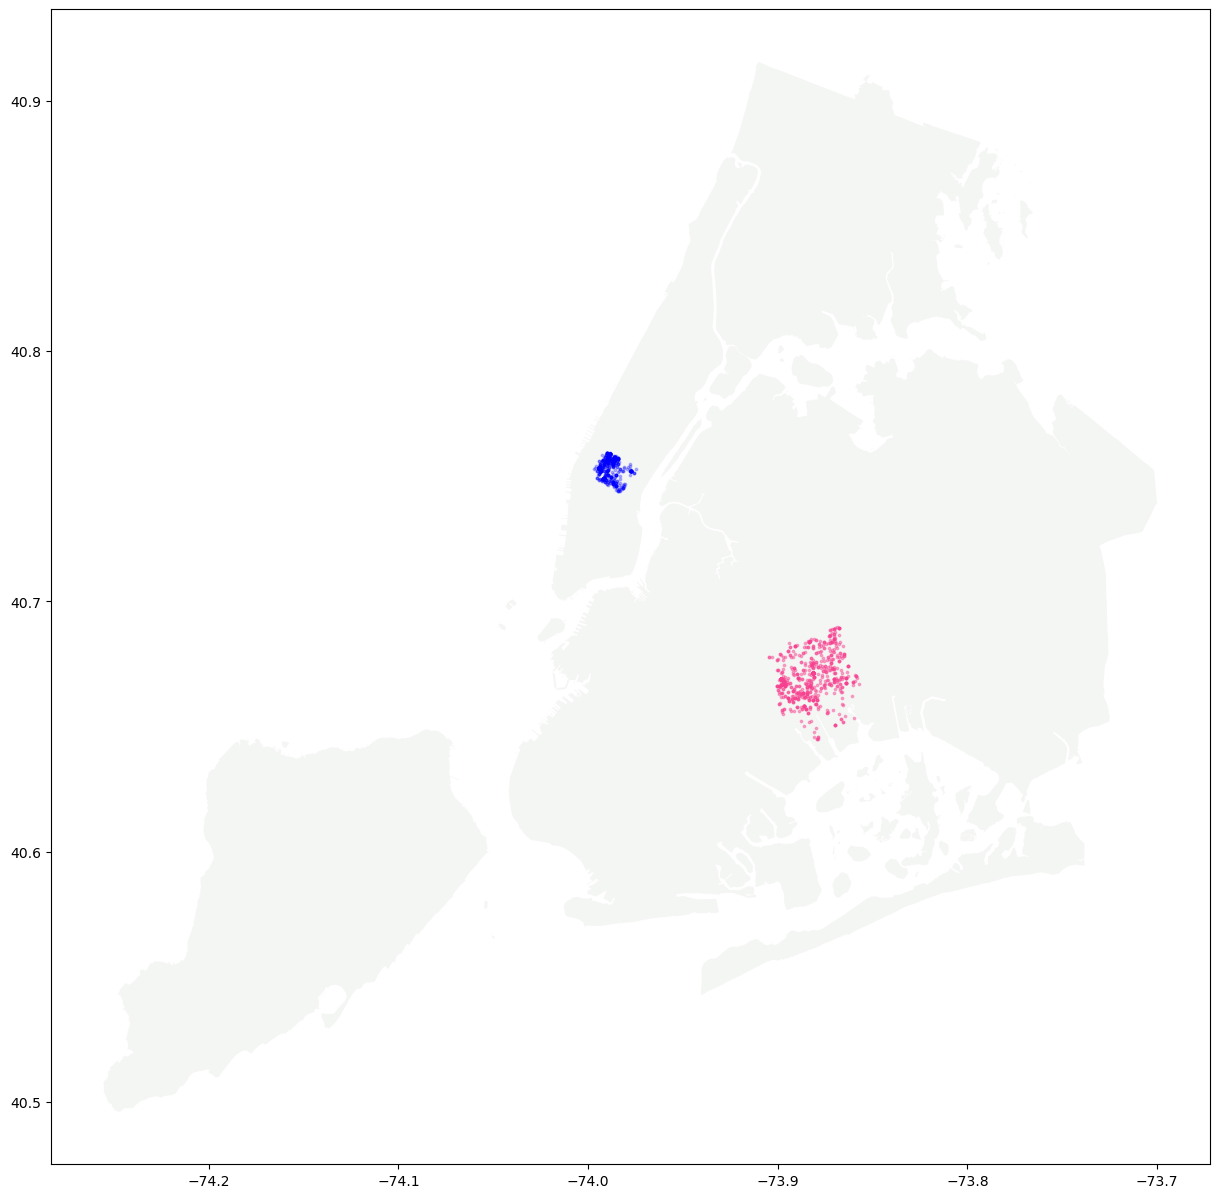

In [156]:
fig, ax = plt.subplots(figsize=(15, 15))
precinct_map.plot(ax=ax, alpha=0.2, color='#CCD3CA')
precinct_75[precinct_75['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES'].plot(ax=ax, marker="o", markersize=3, alpha=0.4,color="#F7418F")
precinct_14[precinct_14['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES'].plot(ax=ax, marker="o", markersize=3, alpha=0.25,color="Blue")

In [161]:
precinct_group = nypd_geo.groupby(by='ARREST_PRECINCT')
precinct_group.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,geometry
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),POINT (-73.84391 40.85579)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996),POINT (-74.07726 40.64500)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054),POINT (-73.96087 40.59405)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552),POINT (-73.91536 40.76955)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135),POINT (-73.91717 40.82413)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19359,261649590,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,22,0,25-44,M,WHITE HISPANIC,993539,222793,40.778187,-73.966460,POINT (-73.96646033 40.77818667),POINT (-73.96646 40.77819)
20289,261415937,01/05/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,M,22,0,45-64,M,ASIAN / PACIFIC ISLANDER,993986,224778,40.783636,-73.964842,POINT (-73.964842 40.783636),POINT (-73.96484 40.78364)
25736,264302760,02/27/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,22,0,25-44,M,WHITE,996042,226910,40.789484,-73.957416,POINT (-73.95741555 40.78948375),POINT (-73.95742 40.78948)
33988,263840922,02/18/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,22,0,25-44,M,UNKNOWN,993700,224344,40.782452,-73.965878,POINT (-73.9658782689495 40.7824518600123),POINT (-73.96588 40.78245)


In [173]:
df = pd.DataFrame(nypd.groupby(['OFNS_DESC']).value_counts())
df1 = pd.DataFrame(df.groupby(['ARREST_PRECINCT']).value_counts())
df1.head()

,,count
ARREST_PRECINCT,count,
1,1,2341
5,1,2596
6,1,2191
7,1,2023
9,1,2015


In [ ]:


store_locDF=pd.read_csv('stores.csv')
cols_to_keep=['store_longitude','store_latitude']

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=geopandas.GeoDataFrame(store_locDF,crs=crs,geometry=geopandas.points_from_xy(store_locDF["store_longitude"], store_locDF["store_latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['active_yn']=="Y"].plot(ax=ax,markersize=200, alpha=0.4,color="green", label="Active Store")
geo_df[geo_df['active_yn']=="N"].plot(ax=ax,markersize=200, alpha=0.4,color="red", label="Inactive Stores")
plt.legend()